In [1]:
import pandas as pd
import numpy as np

In [2]:
df= pd.read_csv('C:/temp/petition.csv',parse_dates=['start','end'])

In [9]:
df.shape

(395547, 8)

In [10]:
df.head(5)

,article_id,start,end,answered,votes,category,title,content
0,21,2017-08-19,2017-11-17,0,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...
1,22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...
2,23,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."
3,24,2017-08-19,2017-08-26,0,53,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...
4,25,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."


In [5]:
df.tail(3)

,article_id,start,end,answered,votes,category,title,content
395544,517120,2019-02-04,2019-03-06,0,0,안전/환경,환경문제,명절이면 후로 제일문제는 쓰레기 문제 입니다.\n제일문제는 선물세트와 농산물세트 입...
395545,517121,2019-02-04,2019-03-06,0,20,정치개혁,"청화대,더불어민주당, 당장 답하라,,,,,,","좌파 더불어민주당, 좌파 정권 청화대는 선한 국민들을 더는 기망하지 말고 담장 답하..."
395546,517122,2019-02-04,2019-03-06,0,16,인권/성평등,여성부 폐지,국민들이 원합니다\n폐지 좀 시키세요;


In [6]:
df.isnull().sum()

article_id    0
start         0
end           0
answered      0
votes         0
category      0
title         0
content       1
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395547 entries, 0 to 395546
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   article_id  395547 non-null  int64         
 1   start       395547 non-null  datetime64[ns]
 2   end         395547 non-null  datetime64[ns]
 3   answered    395547 non-null  int64         
 4   votes       395547 non-null  int64         
 5   category    395547 non-null  object        
 6   title       395547 non-null  object        
 7   content     395546 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 24.1+ MB


In [12]:
df.columns

Index(['article_id', 'start', 'end', 'answered', 'votes', 'category', 'title',
       'content'],
      dtype='object')

In [13]:
df.describe()

,article_id,answered,votes
count,395547.000000,395547.000000,3.955470e+05
mean,251608.934635,0.000073,1.501188e+02
std,153219.216242,0.008562,4.802583e+03
min,21.000000,0.000000,0.000000e+00
25%,115236.500000,0.000000,2.000000e+00
50%,253682.000000,0.000000,5.000000e+00
75%,386137.500000,0.000000,1.500000e+01
max,517122.000000,1.000000,1.192049e+06


<ipython-input-3-725899d5494c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_20['year']=df_20['start'].dt.year
C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

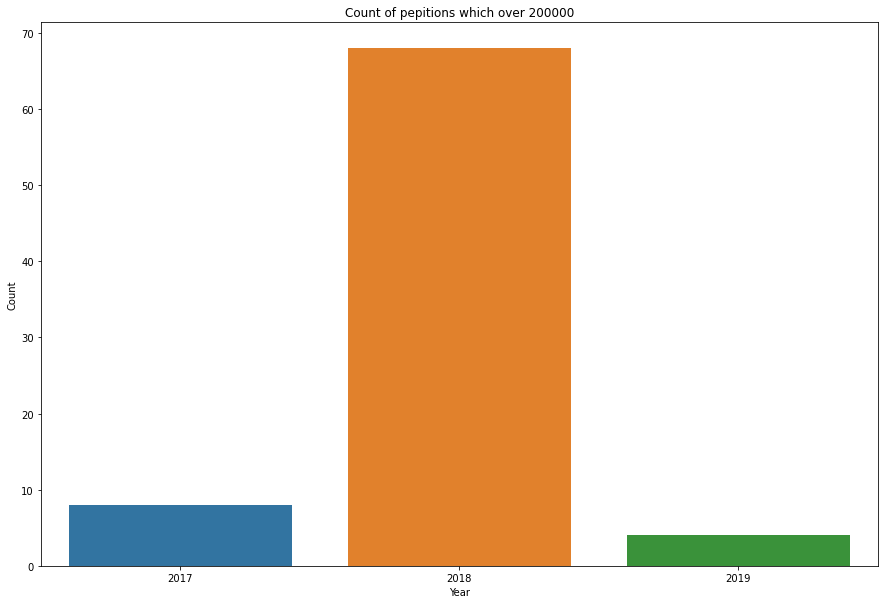

In [3]:
# 20만 건 이상의 청원 수가 가장 많았던 년도는?

df_20 = df.loc[df['votes'] > 200000]
df_20['year']=df_20['start'].dt.year
import matplotlib.pyplot as plt
import seaborn as sns

ax = plt.subplots(figsize=(15,10))
ax =sns.countplot('year',data=df_20)

ax.set_title('Count of pepitions which over 200000')
ax.set_xlabel('Year')
ax.set_ylabel('Count')

# 20만 건 이상의 청원 수가 가장 많았던 년도를 그래프로 출력해 본 결과, 2018년도에 가장 많았다는 것을 알 수 있다.

Text(0, 0.5, 'Average votes')

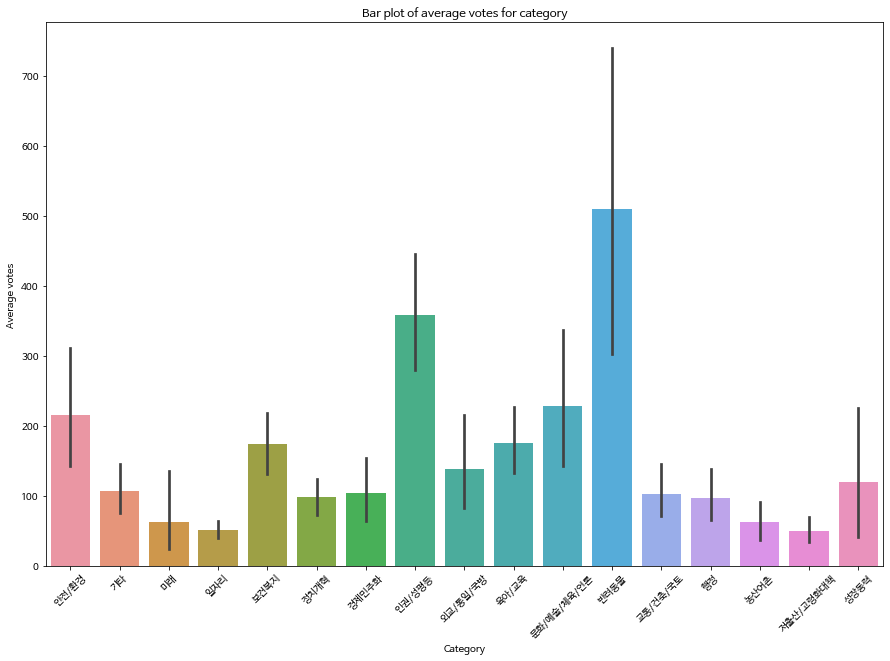

In [4]:
# 카테고리 별 평균 투표 수 

import matplotlib.font_manager as fm
path = 'C:/temp/NanumBarunGothic.ttf'
plt.rcParams['font.family']='NanumBarunGothic'

ax = plt.subplots(figsize=(15,10))
ax = sns.barplot(x='category',y='votes',data=df)
plt.xticks(rotation=45)
plt.title('Bar plot of average votes for category')
plt.xlabel('Category')
plt.ylabel('Average votes')

# 카테고리 별로 평균 투표수를 출력한 결과, 반려동물 부분의 투표수가 가장 많았고, 그 다음으로는 인권/성평등 부분의 투표수가 많은 것을 알 수 있다.

Text(0, 0.5, 'Votes')

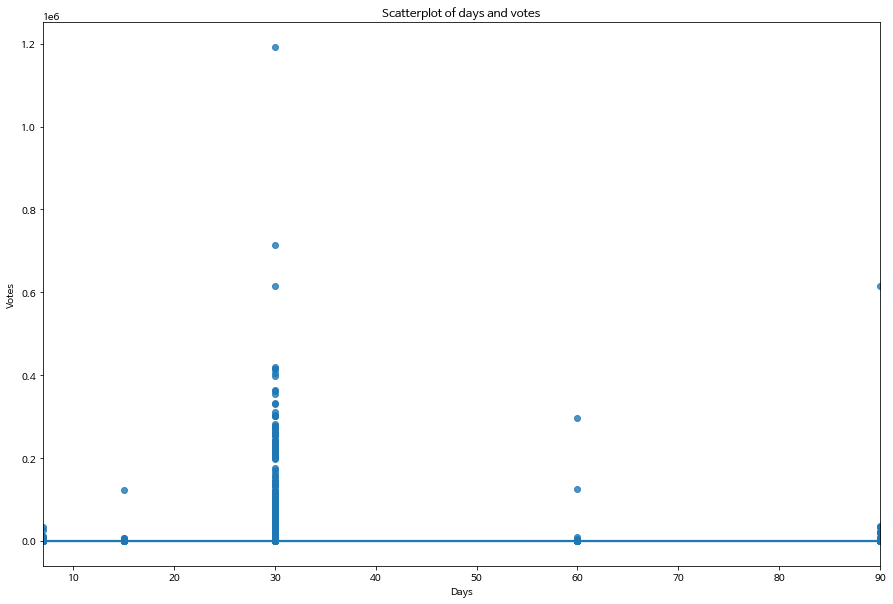

In [5]:
# 청원 기간에 따른 투표 수 

df['D']=df['end']-df['start']
df['days']=df['D'].dt.days  
ax = plt.subplots(figsize=(15,10))
ax= sns.regplot(x='days',y='votes',data=df)
ax.set_title('Scatterplot of days and votes')
ax.set_xlabel('Days')
ax.set_ylabel('Votes')

# 청원 기간(청원 마감 날짜 - 청원 시작 날짜)에 따른 투표 수를 그래프로 출력한 결과, 청원 기간이 30일인 경우가 투표 수가 가장 많았다는 것을 알 수 있다.

Text(0, 0.5, 'Votes')

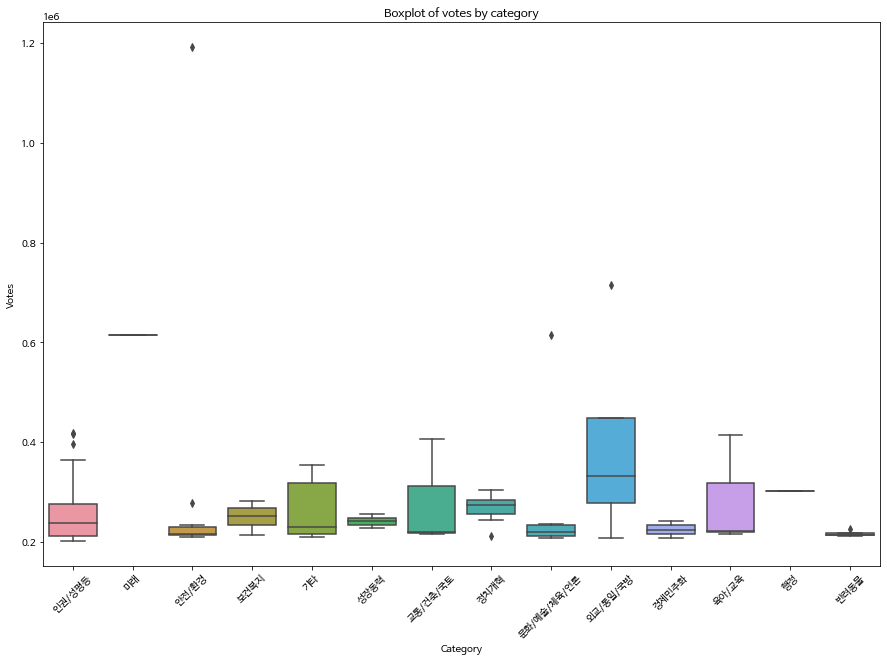

In [6]:
# 답변 대상이 아닌 청원의 카테고리 별 투표 수 

df_1= df['votes']<200000 
ax = plt.subplots(figsize= (15,10))
ax = sns.boxplot(x='category',y='votes',data=df_20)
plt.xticks(rotation=45)
plt.title('Boxplot of votes by category')
plt.xlabel('Category')
plt.ylabel('Votes')

# 답변 대상이 아닌 청원의 카테고리 별 투표수를 그래프로 그려본 결과 외교/통일/국방 부분의 범위가 가장 넓은 것으로 나타났다. 

Text(0, 0.5, 'Average votes')

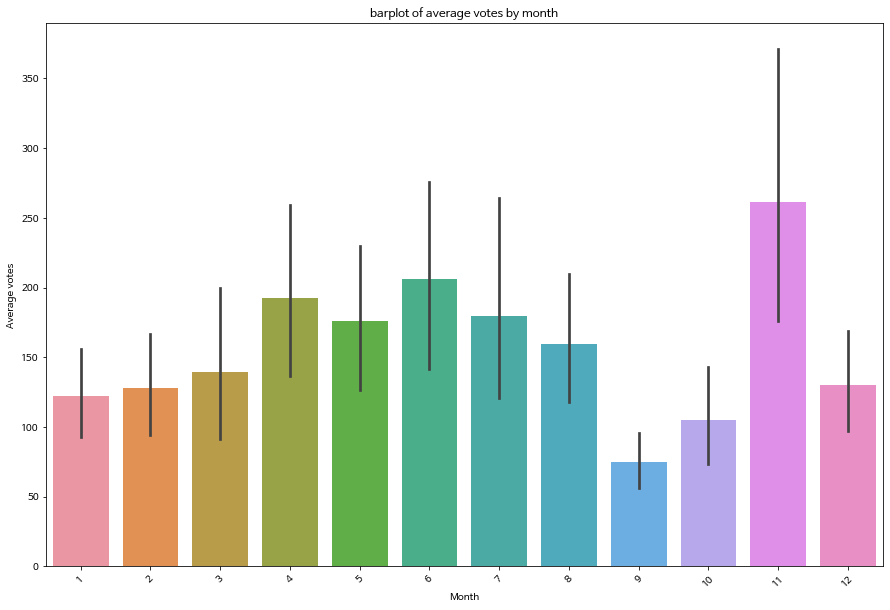

In [12]:
# 평균 투표 수가 가장 많았던 달은?

df['Month']=df['end'].dt.month
ax = plt.subplots(figsize= (15,10))
ax = sns.barplot(x='Month',y='votes',data=df)
plt.xticks(rotation=45)
plt.title('barplot of average votes by month')
plt.xlabel('Month')
plt.ylabel('Average votes')

# 평균 투표 수가 가장 많았던 달은 그래프를 그려본 결과 11월이 가장 많았던 것을 알 수 있다.